<a href="https://colab.research.google.com/github/alfazick/GenerativeAI/blob/main/Variational_AutoEncoders_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Variational Autoencoders (VAEs)#

Variational Autoencoders (VAEs) are a type of generative model that belong to the family of autoencoders. They are particularly designed to learn a latent (hidden) representation of input data. The goal of a VAE is not just to compress the data but also to learn the underlying probability distribution of the data so that it can generate new data points that resemble the original input data. Here's a step-by-step explanation of how VAEs work:

Encoding: The VAE starts by taking an input (e.g., an image) and passing it through an encoder neural network. This network compresses the input into a lower-dimensional latent space. Unlike traditional autoencoders, which directly encode the input into a latent representation, VAEs encode the input into two things for each dimension in the latent space: a mean (μ) and a standard deviation (σ). These parameters describe a probability distribution for each latent dimension.

Reparameterization Trick: To generate a new sample from the latent space, VAEs use something called the "reparameterization trick." Instead of sampling a value directly from the probability distribution defined by μ and σ (which would be non-differentiable and problematic for backpropagation), the model samples from a standard normal distribution and then transforms that sample using the μ and σ it generated during encoding. This allows the model to backpropagate through the random sampling process.

Decoding: The sampled latent variables are then passed through a decoder neural network that attempts to reconstruct the original input from the latent representation. The decoder essentially learns the conditional probability of the input given the latent representation.

Loss Function: The VAE is trained using a loss function that has two main components:

Reconstruction Loss: This measures how well the decoded samples match the original inputs. The goal is to ensure that the VAE can accurately reconstruct the input data from the latent representation.
KL Divergence: This part of the loss function measures how much the learned latent variable distribution (defined by the μs and σs) diverges from a prior distribution, typically chosen to be the standard normal distribution. This encourages the latent space to follow a known distribution, which facilitates sampling new data points.
By optimizing both the reconstruction loss and the KL divergence, VAEs learn to encode useful representations in the latent space and can generate new data points by sampling from this space. The generated samples should resemble the original data but are not exact copies, reflecting the model's capacity to understand and recreate the variability within the input data.

VAEs have a wide range of applications, from generating realistic images, text, and music to more complex tasks like semi-supervised learning, anomaly detection, and more.




**A real-world application of Variational Autoencoders (VAEs)** that's both intriguing and widely explored is in the field of image generation and modification. For example, VAEs can be used for generating new faces, transforming facial expressions, or even creating entirely new content in the style of existing images. Another practical application is in anomaly detection, where VAEs can identify unusual patterns or outliers in datasets, such as detecting fraudulent transactions or identifying defective products in manufacturing lines.

Let's demonstrate a simple Python code example using a VAE to generate new digits similar to those in the MNIST dataset, a collection of 70,000 handwritten digits. This example will cover the basics of defining and training a VAE model with TensorFlow and Keras.

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K
import numpy as np


In [11]:

class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        # Add KL divergence regularization loss.
        kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
        self.add_loss(kl_loss)
        return reconstructed

# Assuming encoder and decoder are defined as before
# Initialize VAE model
vae = VAE(encoder, decoder)

# Compile the model
vae.compile(optimizer='adam', loss=binary_crossentropy)

# Train the model
vae.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 12s 43ms/step - loss: 0.3302 - val_loss: 0.2668
Epoch 2/50
235/235 [==============================] - 10s 41ms/step - loss: 0.2654 - val_loss: 0.2641
Epoch 3/50
235/235 [==============================] - 9s 40ms/step - loss: 0.2640 - val_loss: 0.2634
Epoch 4/50
235/235 [==============================] - 9s 38ms/step - loss: 0.2635 - val_loss: 0.2630
Epoch 5/50
235/235 [==============================] - 10s 41ms/step - loss: 0.2633 - val_loss: 0.2630
Epoch 6/50
235/235 [==============================] - 11s 47ms/step - loss: 0.2632 - val_loss: 0.2628
Epoch 7/50
235/235 [==============================] - 9s 39ms/step - loss: 0.2631 - val_loss: 0.2627
Epoch 8/50
235/235 [==============================] - 9s 37ms/step - loss: 0.2631 - val_loss: 0.2628
Epoch 9/50
235/235 [==============================] - 10s 42ms/step - loss: 0.2631 - val_loss: 0.2628
Epoch 10/50
235/235 [==============================] - 9s 40ms/step - loss: 0.2630 - v

1/1 [==============================] - 0s 26ms/step


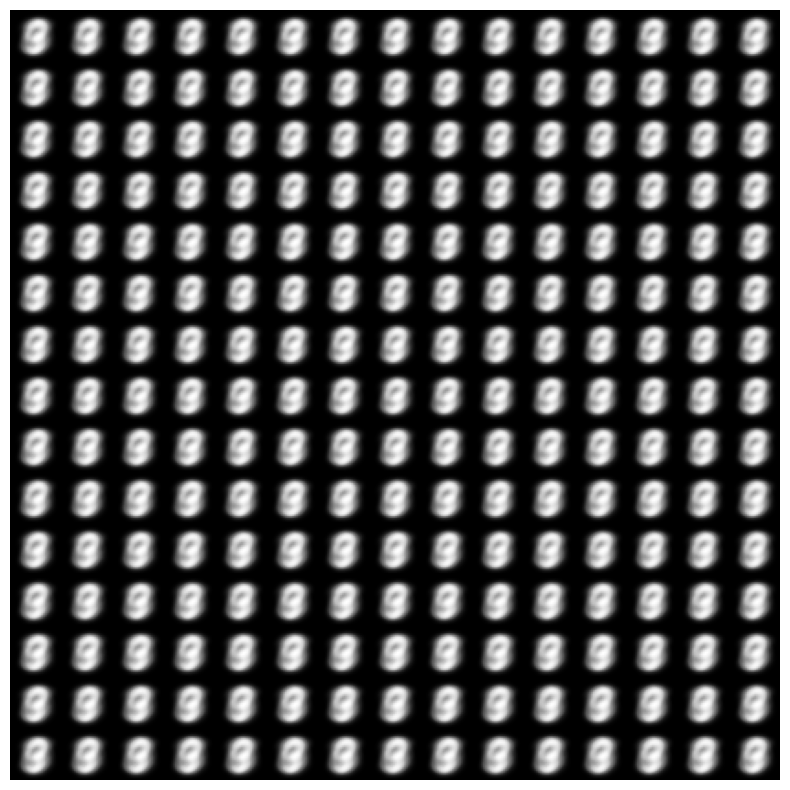

In [13]:
import numpy as np
import matplotlib.pyplot as plt

n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# Linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = np.linspace(-3, 3, n)
grid_y = np.linspace(-3, 3, n)

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

# Plotting the figure
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()

